In [19]:
import numpy as np
from matplotlib import pyplot as plt


In [76]:
################# THIS IS WHERE YOU CHOOSE WHAT TO LOAD ################################

correlation_cut = 0.8   # if negative none, current other options are 0.9 and 0.8, but more can be added

cut_version = 3   # -1 means OG, otherwise can be 2 or 3 (or more if added)

event_type = "emu"  # could be ee, emu, mumu

#This is only here in case format is changed... should be good for all three layer stuff otherwise
model_name = "threeLayerModel_" + event_type + "_corrCut_" + str(correlation_cut)  

if cut_version > 0:
    model_name += "cutV" + str(cut_version)

In [77]:
validation = np.load("../data/three_layers/" + model_name + "_loss_val_array.npy")
train = np.load("../data/three_layers/" + model_name + "_loss_train_array.npy")

In [78]:
print("epochs are " + str(10 * len(train)))

epochs are 7460


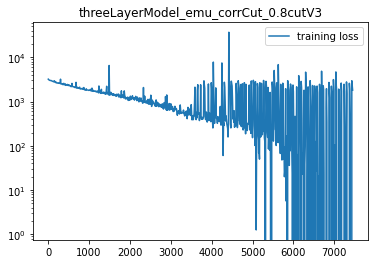

In [79]:
figure = plt.figure()
ax = figure.add_subplot(111)
# ax.plot(10 *np.array(range( len(validation))), validation, label = "validation loss")
ax.plot(10 *np.array(range(len(train))), train, label="training loss")
ax.legend()
plt.title(model_name)
plt.yscale("log")